In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad
from scipy.stats import uniform
from scipy.stats import poisson

# Exercise 10.5

We show that the Metropolis-Hastings construction is reversible.
We want to show that $\pi_{s}p_{s's} = \pi_{s'}p_{ss'}$. 
There are 2 cases (each with a subcase to consider. 


1. Assume that $\pi_s q_{s's} \geq \pi_{s'} q_{ss'}$, then we have that 
$a_{s's} = \frac{\pi_{s'} q_{ss'}} {\pi_s q_{s's}}$ and $a_{ss'} = 1$. Furthermore

\begin{align}
        p_{s's} = q_{s's}a_{s's} = \frac{\pi_{s'} q_{ss'}}{\pi_s} \implies \pi_s p_{s's} = \pi_{s'}q_{ss'}
\end{align}

      Similarly

\begin{align}
    p_{ss'} = q_{ss'}a_{ss'} = q_{ss"}\implies \pi_{s'}p_{ss'} = \pi_{s'} q_{ss'}
\end{align}
    and we can see that $pi_{s}p_{s's} = \pi_{s'}p_{ss'}$.

2. Suppose that without loss of generality we have that that $q_{ss'} = 0$ then $\pi_s p_{ss'} = 0$ and $\pi_{s'} p_{ss'} = 0$ (using the equations above). Therefore $pi_{s}p_{s's} = \pi_{s'}p_{ss'}$. 


3. Assume that $\pi_s q_{s's} < \pi_{s'} q_{ss'}$, then we have that $a_{s's} = 1$ and $a_{ss'} = \frac{\pi_s q_{s's}}{pi_{s'}q_{ss'}}$. Then as before 

    \begin{align}
        p_{s's} = q_{s's} a_{s's} = q_{s's}
    \end{align}

      and 

    \begin{align}
        p_{ss'} = q_{ss'} a_{ss'} = \frac{\pi_s q_{s's}}{\pi_{s'}}
    \end{align}
    
    Therefore $\pi_s \pi_{s's} = \pi_{s'}p_{ss}$ as desired. 
    
4. Finally, without loss of generality suppose that $q_{s's} = 0 \implies p_{s's} = 0$. then note that $p_{ss'} =0 $ as well (using the equations above). Thus $0 = 0$ so $\pi_s \pi_{s's} = \pi_{s'}p_{ss}$.

# Exercise 10.6

## part 1
The acceptance probability can be calculated as follows

\begin{align}
    a_{s's} &= \min\left(\frac{\pi_{s'}q_{s s'}}{\pi_s q_{s's}}, 1\right)
\end{align}

Note that

\begin{align}
q_{s's} &= P(X_{t+1} = s' | X_{t} = s) =
\begin{cases}
p & \text{ if } s' > s\\
1 - p & \text{ if } s' < s\\
p & \text{ if } s' = s = M\\
1-p & \text{ if } s' = s =1
\end{cases}
\end{align}

Similarily,

\begin{align}
q_{ss'} &= P(X_{t+1} = s | X_{t} = s') =
\begin{cases}
p & \text{ if } s > s'\\
1 - p & \text{ if } s < s'\\
p & \text{ if } s' = s = M\\
1-p & \text{ if } s' = s =1
\end{cases}
\end{align}

This gives the acceptance probability as

\begin{align}
a_{s', s} &=
\begin{cases}
\min\left( \frac{s^\alpha}{(s')^{\alpha}},1\right) & \text{ if } s' = s = M \text{ or } s' = s = 1\\
\min\left(\frac{s^\alpha}{(s')^{\alpha}} \frac{1-p}{p} ,1\right) & \text{ if } s < s'\\
\min\left(\frac{s^\alpha}{(s')^{\alpha}} \frac{p}{1-p} ,1\right) & \text{ if } s > s'\\
\end{cases}
\end{align}



## part 2 and part 3

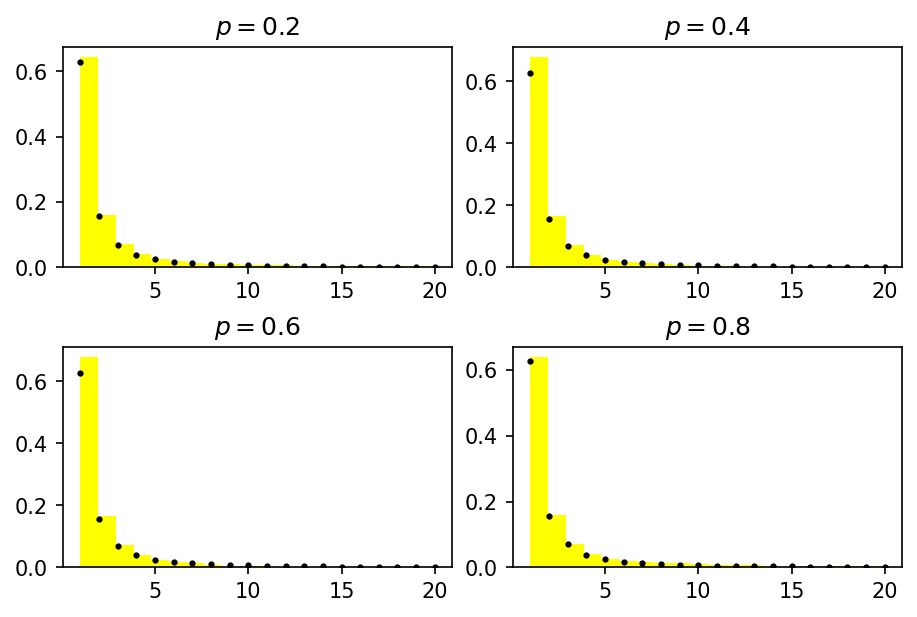

In [78]:
def Zipf(M, p,  n=10**4,alpha=2):
    """Draw a sample of length ￿n￿ from the Zipf distribution
    with exponent ￿alpha￿ on the set {1,2,...,M} using
    Metropolis-Hastings and the symmetric random-walk proposal.
    """
    def Bernoulli(p): # Draw from Bernoulli(p)
        return np.random.rand() <= p # rand() is uniform on [0,1]

    t = 0 # Initialize t
    y = np.empty(n) # Initialize y

    y[0]= np.random.randint(1,M+1) # Start at a random location

    while t < n-1:
        proposal = min(max(1, y[t] + (-1)**Bernoulli(1-p)), M)
        #now calculate acceptance probability based on proposal.
        if (proposal == M and y[t] == M) or (proposal == 1 and y[t] == 1):
            accept_prob = y[t]**alpha / proposal**alpha
        elif y[t] < proposal:
            accept_prob = y[t]**alpha * (1-p) / (p * proposal**alpha)
        elif y[t] > proposal:
            accept_prob = y[t]**alpha * p / ((1-p) * proposal**alpha)
        if Bernoulli(accept_prob): # Proposal accepted
            y[t+1] = proposal
        else: # Proposal rejected
            y[t+1] = y[t]
        t += 1
    return y

def problem10_6():
    #initialize constants
    n = int(1e5)
    M = 20
    alpha = 2.0
    k_vals = np.arange(1, 5)
    p_vals = k_vals / 5


    fig, axs = plt.subplots(2, 2, constrained_layout=True)
    fig.set_dpi(150)

    #current zipf distribution
    Z = np.sum(np.arange(1, M+1)**(-alpha))
    X = np.arange(1, M+1)
    for k, p in zip(k_vals, p_vals):
        #get the samples for the histogram from the previous problem
        samples = Zipf(M, p, n=n, alpha=alpha)
        if k == 1:
            ax = axs[0, 0]
        elif k == 2:
            ax = axs[0, 1]
        elif k == 3:
            ax = axs[1, 0]
        elif k == 4:
            ax = axs[1, 1]

        #now we plot
        ax.plot(X, X**(-alpha)/ Z, 'ko', markersize=2 )
        ax.hist(samples, bins=20, density=True, color='yellow' )
        ax.set_title(r'$p=$' + str(p))

    plt.show()

    return
problem10_6()

# Exercise 10.7

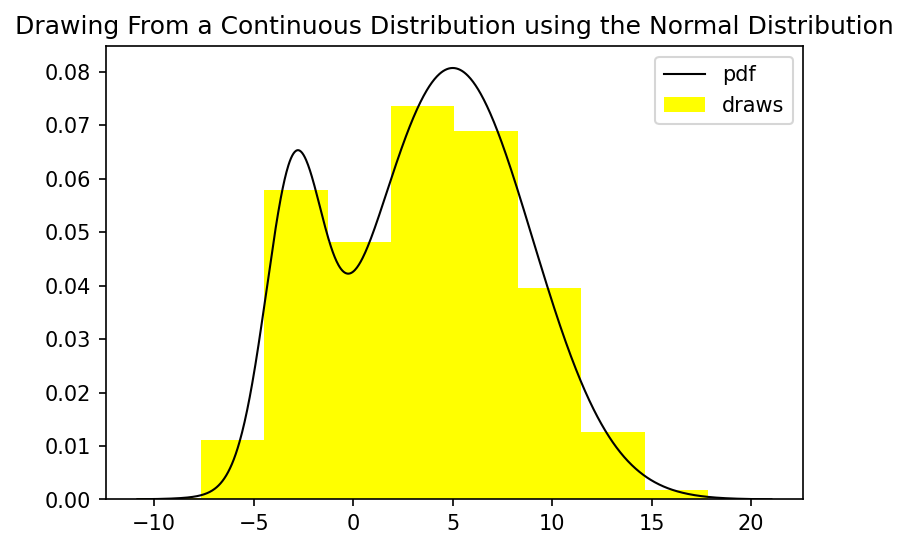

In [90]:
def MH_normal_continuous(f, sigma2, y0, N=int(1e5)):

    def Bernoulli(p): # Draw from Bernoulli(p)
        return np.random.rand() <= p # rand() is uniform on [0,1]

    sigma = np.sqrt(sigma2)

    t = 0 # Initialize t
    y = np.empty(N) # Initialize y

    y[0]= y0 # Start at our initial location

    while t < N-1:
        #draw the proposal
        proposal = np.random.normal(loc=y[t], scale=sigma)
        #calculate the acceptance probability
        acceptance_prob = min(f(proposal) * norm.pdf(y[t], loc=proposal, scale=sigma) /
                            (f(y[t]) * norm.pdf(proposal, loc=y[t], scale=sigma)), 1)
        #now decide if to accept or reject.
        if Bernoulli(acceptance_prob):
            y[t+1] = proposal
        else:
            y[t+1] = y[t]

        t += 1

    return y

def problem10_7(sigma2 =1, y0=5):
    #define needed variables
    f = lambda s: 4*np.exp(-(s+3)**2/4) + 6*np.exp(-(s-5)**2/ 32)
    y0 = 5

    #call function
    samples = MH_normal_continuous(f, sigma2, y0)

    #get integrating factor
    Z, _ = quad(f, -np.inf, np.inf)
    #create p.d.f.
    f_pdf = lambda x: f(x) / Z

    #now we plot
    x = np.linspace(np.min(samples), np.max(samples), 1000)
    fig = plt.figure()
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.plot(x, f_pdf(x), 'k-', linewidth=1, label='pdf')
    ax.hist(samples, density=True, color='yellow', label='draws')
    ax.legend(loc='best')
    ax.set_title('Drawing From a Continuous Distribution using the Normal Distribution')
    plt.show()

problem10_7()

# Exercise 10.8

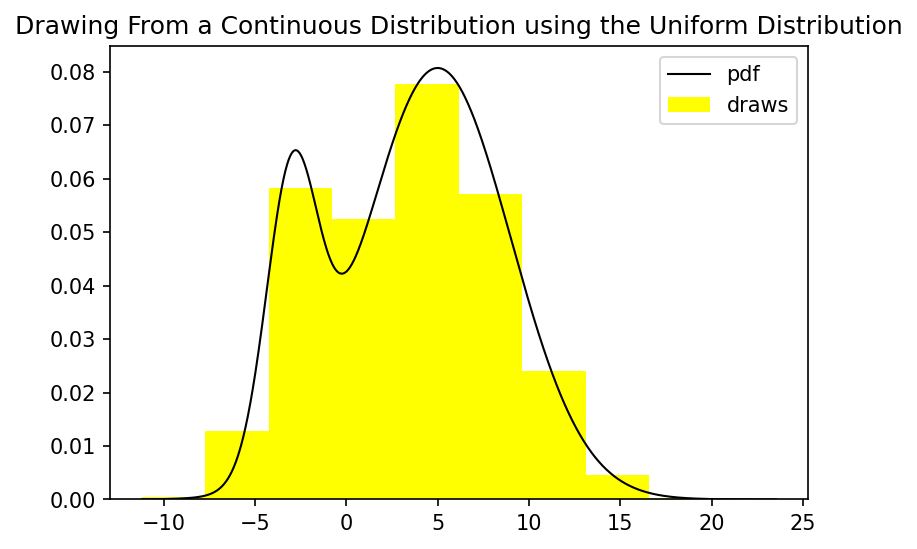

mean: 3.353562337560544
variance: 23.587876196246413
median: 3.6497541089516
first quartile: -5.735451731063708
third quaritle: -4.713481685992376


In [91]:
def MH_uniform_continuous(f, L, y0, N=int(1e5)):

    def Bernoulli(p): # Draw from Bernoulli(p)
        return np.random.rand() <= p # rand() is uniform on [0,1]

    t = 0 # Initialize t
    y = np.empty(N) # Initialize y

    y[0]= y0 # Start at our initial location

    while t < N-1:
        #draw the proposal
        proposal = np.random.uniform(low=y[t]-L, high=y[t] + L)
        #calculate the acceptance probability
        acceptance_prob = min( f(proposal) * uniform.pdf(y[t], loc=proposal-L, scale=2*L) /
                               (f(y[t]) * uniform.pdf(proposal, loc=y[t]-L, scale=2*L)), 1)
        #now decide if to accept or reject.
        if Bernoulli(acceptance_prob):
            y[t+1] = proposal
        else:
            y[t+1] = y[t]

        t += 1

    return y

def problem10_8(L =1, y0=5):
    #define needed variables
    f = lambda s: 4*np.exp(-(s+3)**2/4) + 6*np.exp(-(s-5)**2/ 32)
    y0 = 5

    #call function
    samples = MH_uniform_continuous(f, L, y0)

    #get integrating factor
    Z, _ = quad(f, -np.inf, np.inf)
    #create p.d.f.
    f_pdf = lambda x: f(x) / Z

    #now we estimate the mean, variance, median, and first and third quartiles

    mean = np.mean(samples)
    variance = np.var(samples)
    median = np.median(samples)
    Q1 = np.percentile(samples, 1)
    Q3 = np.percentile(samples, 3)

    #now we plot
    x = np.linspace(np.min(samples), np.max(samples), 1000)
    fig = plt.figure()
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.plot(x, f_pdf(x), 'k-', linewidth=1, label='pdf')
    ax.hist(samples, density=True, color='yellow', label='draws')
    ax.legend(loc='best')
    ax.set_title('Drawing From a Continuous Distribution using the Uniform Distribution')
    plt.show()

    return mean, variance, median, Q1, Q3

mean, variance, median, Q1, Q3 = problem10_8()
print('mean:', mean)
print('variance:', variance)
print('median:', median)
print('first quartile:', Q1)
print('third quartile:', Q3)

# Exercise 10.9

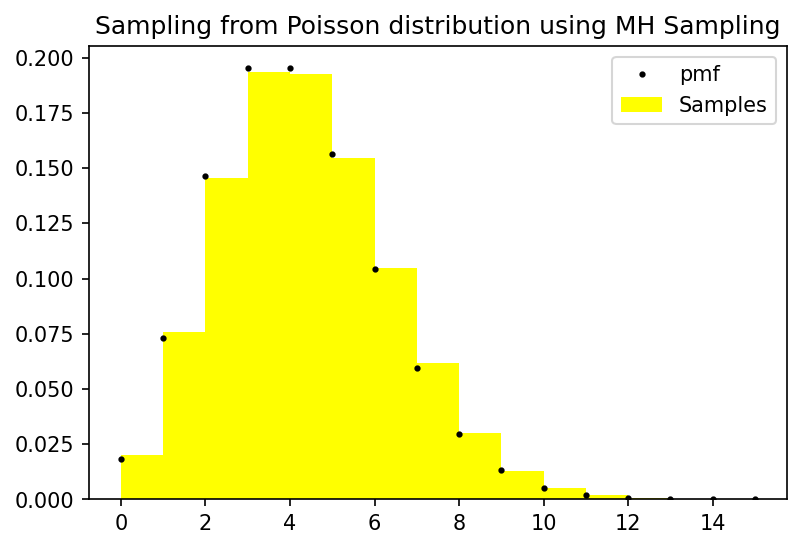

In [4]:
def MH_poisson(lam, p, x0, N=int(1e5)):

    def Bernoulli(p): # Draw from Bernoulli(p)
        return np.random.rand() <= p # rand() is uniform on [0,1]

    t = 0 # Initialize t
    y = np.empty(N) # Initialize y

    y[0]= x0 # Start at our initial location

    while t < N-1:
        #draw the proposal
        proposal = max(0, y[t] + (-1)**Bernoulli(1-p))

        #calculate the acceptance probability
        if proposal == 0 and y[t] == 0:
            acceptance_prob = min(poisson.pmf(proposal, lam) /poisson.pmf(y[t], lam), 1)
        elif y[t] < proposal:
            acceptance_prob = min(poisson.pmf(proposal, lam)*(1-p) / (poisson.pmf(y[t], lam)*p), 1)
        elif y[t] > proposal:
            acceptance_prob = min(poisson.pmf(proposal, lam)*p / (poisson.pmf(y[t], lam)*(1-p)), 1)
        if Bernoulli(acceptance_prob): # Proposal accepted
            y[t+1] = proposal
        else: # Proposal rejected
            y[t+1] = y[t]
        t += 1

    return y


def problem10_9(lam=4, p=0.3, x0=3):

    #get samples
    samples = MH_poisson(lam, p, x0)

    #plot
    x = np.arange(np.min(samples), np.max(samples)+1)
    fig = plt.figure()
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.plot(x, poisson.pmf(x, lam), 'ko', label='pmf', markersize=2)
    ax.hist(samples, color='yellow', label='Samples', density=True, bins=15)
    ax.legend(loc='best')
    ax.set_title('Sampling from Poisson distribution using MH Sampling')
    plt.show()

    return
problem10_9()